This code is to work through the concept of gradient descent in a simple regression problem.

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import uniform
%matplotlib inline

In [99]:
df = pd.read_csv('gradient-descent/HouseDataset.csv')
df.columns = ['GrLivArea','SalePrice']
df.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [100]:
x = df.GrLivArea.values
y = df.SalePrice.values

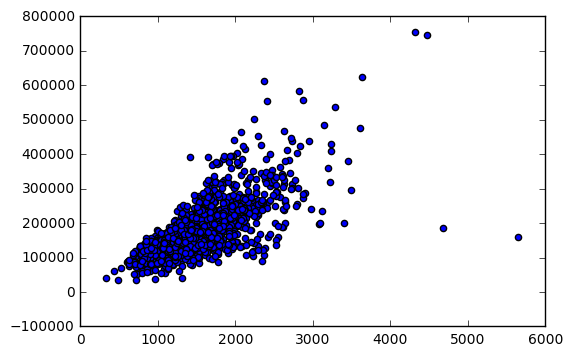

In [101]:
p = plt.scatter(x,y)

There is a linear relationship between Ground Living Area (GrLivArea). Let us describe it by the formular y = ax + b and use 'Y' to denote the estimate of 'y'.

In [102]:
#randomly initialize the initial estimate of a and b using 
# avg housprice/avg floor space as the limit for a and 
# average  price as the limit for b. 
# There's no science behind these numbers, they just seem like reasobanle arbitrary starting points


a = uniform(0,200)
b = uniform(0, 50000)
print(a,b)

51.86376735376959 23348.872520602366


In [103]:
Y = a*x+b

In [104]:
def MSE(predictedY,actualY):
    '''    
    :param predictedY: an array of predicted y values
    :param actualY: an array of the actual y values
    :return: the mean squared error - the squared difference between actualy and predicted y
    '''
    
    error = (predictedY-actualY)
    SqError = error**2
    MeanSqError = sum(SqError)/len(actualY)
    return MeanSqError

MeanSqError =  MSE(Y,y)
print(MeanSqError)

10219672796.5


The next step is to find the change in mean squared error with respect to a change in 'a', and separately 'b'.

(Y-y)**2 = (ax +b -y)**2
	= (ax +b -y)*(ax +b -y)
	= (ax)**2 +2abx -2 axy -2by +B**2 +y**2

In [105]:
#runs through one epoch
for i in range(0,len(y)):   
    dMeanSqError_da =(2*x[i]*(a*x[i]+b-y[i]))/float(len(Y))
    dMeanSqError_db = (2*(a*x[i]-y[i]+b))/float(len(Y))
    learning_rate = 0.00001
    a = a - learning_rate*dMeanSqError_da
    b = b - learning_rate*dMeanSqError_db
    Y = a*x+b
    MeanSqError = MSE(Y,y)
    #print(dMeanSqError_da, dMeanSqError_db, MeanSqError)
    if i%100 ==0:
        print(a,b, MeanSqError)

54.1234055164 23348.873842 9623006137.24
95.1142410024 23348.8979263 3360053539.21
102.524876424 23348.900937 3150534130.19
102.68940021 23348.8990966 3149088770.29
109.901586271 23348.8992948 3222594988.39
109.886938618 23348.8933659 3222174375.54


112.766208104 23348.8995701 3326051523.95
124.469018996 23348.9011459 4187273177.15
112.667267374 23348.889947 3321774046.95
106.901730548 23348.8829519 3159512482.95
104.707138732 23348.8821897 3142690207.22
98.3231519378 23348.8787028 3234643111.73


110.65206241 23348.8783727 3245616515.43
68.1266451702 23348.8696278 6511254615.72
93.9169060143 23348.8840607 3420420491.37


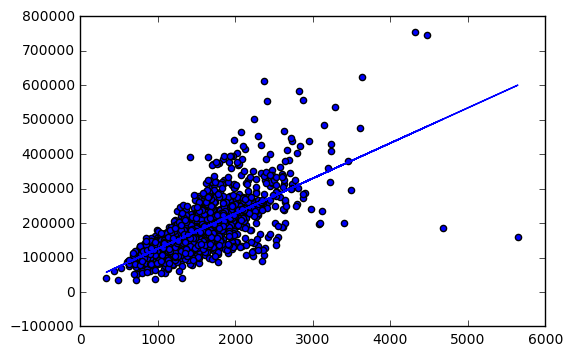

In [109]:
p1 = plt.plot(x,Y)
p1 = plt.scatter(x,y)